In [10]:
import pickle 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [11]:
fp = open("../data/inquirer-alignment-by-category.pkl","rb")
scores = pickle.load(fp)
meanv = pickle.load(fp)

In [12]:
# What are our categories?
scores.keys()

dict_keys(['Positiv', 'Negativ', 'Pstv', 'Affil', 'Ngtv', 'Hostile', 'Strong', 'Power', 'Weak', 'Submit', 'Active', 'Passive', 'Pleasur', 'Pain', 'Feel', 'Arousal', 'EMOT', 'Virtue', 'Vice', 'Ovrst', 'Undrst', 'Academ', 'Doctrin', 'Econ@', 'Exch', 'ECON', 'Exprsv', 'Legal', 'Milit', 'Polit@', 'POLIT', 'Relig', 'Role', 'COLL', 'Work', 'Ritual', 'SocRel', 'Race', 'Kin@', 'MALE', 'Female', 'Nonadlt', 'HU', 'ANI', 'PLACE', 'Social', 'Region', 'Route', 'Aquatic', 'Land', 'Sky', 'Object', 'Tool', 'Food', 'Vehicle', 'BldgPt', 'ComnObj', 'NatObj', 'BodyPt', 'ComForm', 'COM', 'Say', 'Need', 'Goal', 'Try', 'Means', 'Persist', 'Complet', 'Fail', 'NatrPro', 'Begin', 'Vary', 'Increas', 'Decreas', 'Finish', 'Stay', 'Rise', 'Exert', 'Fetch', 'Travel', 'Fall', 'Think', 'Know', 'Causal', 'Ought', 'Perceiv', 'Compare', 'Eval@', 'EVAL', 'Solve', 'Abs@', 'ABS', 'Quality', 'Quan', 'NUMB', 'ORD', 'CARD', 'FREQ', 'DIST', 'Time@', 'TIME', 'Space', 'POS', 'DIM', 'Rel', 'COLOR', 'Self', 'Our', 'You', 'Name', 'Y

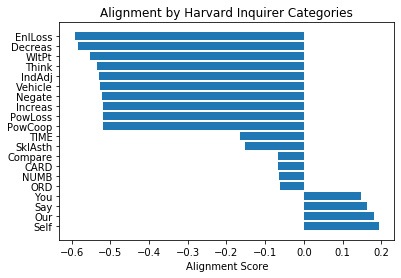

In [13]:
data = sorted(meanv.items(),key=lambda x: x[1], reverse=True)

# plot top 10 most and least aligned categories
labels = [x[0] for x in data][:10] + [x[0] for x in data][-10:]
values = [x[1] for x in data][:10] + [x[1] for x in data][-10:]

plt.barh(np.arange(len(values)),values,tick_label=labels)
plt.title("Alignment by Harvard Inquirer Categories")
plt.xlabel("Alignment Score")
plt.show()

In [14]:
all_categories = list(scores.keys())
feelings = ["Pleasur","Pain","Feel","Arousal", "EMOT", "Virtue", "Vice"]
valence = ["Positiv", "Negativ"]
institutional = ["Polit@", "Relig", "Legal", "Milit", "Exprsv", "Econ@", "Academ"]

In [15]:
def make_alignments(categories):
    # obtain all word alignment scores
    all_values = dict()
    for category in categories:
        for wv in scores[category]:
            if len(wv) == 2:
                all_values[wv[0]] = wv[1]

    # plot alignments for words
    data = sorted(all_values.items(),key=lambda x: x[1], reverse=True)

    fig = plt.figure(figsize=(35, 20), dpi=75)
    # plot top 25 most and least aligned categories
    labels = [x[0] for x in data][:25] + [x[0] for x in data][-25:]
    values = [x[1] for x in data][:25] + [x[1] for x in data][-25:]

    plt.barh(np.arange(len(values)),values,tick_label=labels)
    plt.title("Individual Word Alignment Values")
    plt.xlabel("Alignment Score")
    plt.show()
    
    # plot alignments for words but subtract stopwords
    stopwords = list(ENGLISH_STOP_WORDS)
    stopwords = stopwords + ["thy", "thou"]
    print("removing {0} stopwords".format(len(stopwords)))

    data = sorted(all_values.items(),key=lambda x: x[1], reverse=True)
    data = [x for x in data if x[0] not in stopwords]

    fig = plt.figure(figsize=(35, 20), dpi=75)

    # plot top 25 most and least aligned categories
    labels = [x[0] for x in data][:25] + [x[0] for x in data][-25:]
    values = [x[1] for x in data][:25] + [x[1] for x in data][-25:]

    plt.barh(np.arange(len(values)),values,tick_label=labels)
    plt.title("Individual Word Alignment Values: Without Stopwords")
    plt.xlabel("Alignment Score")
    plt.show()

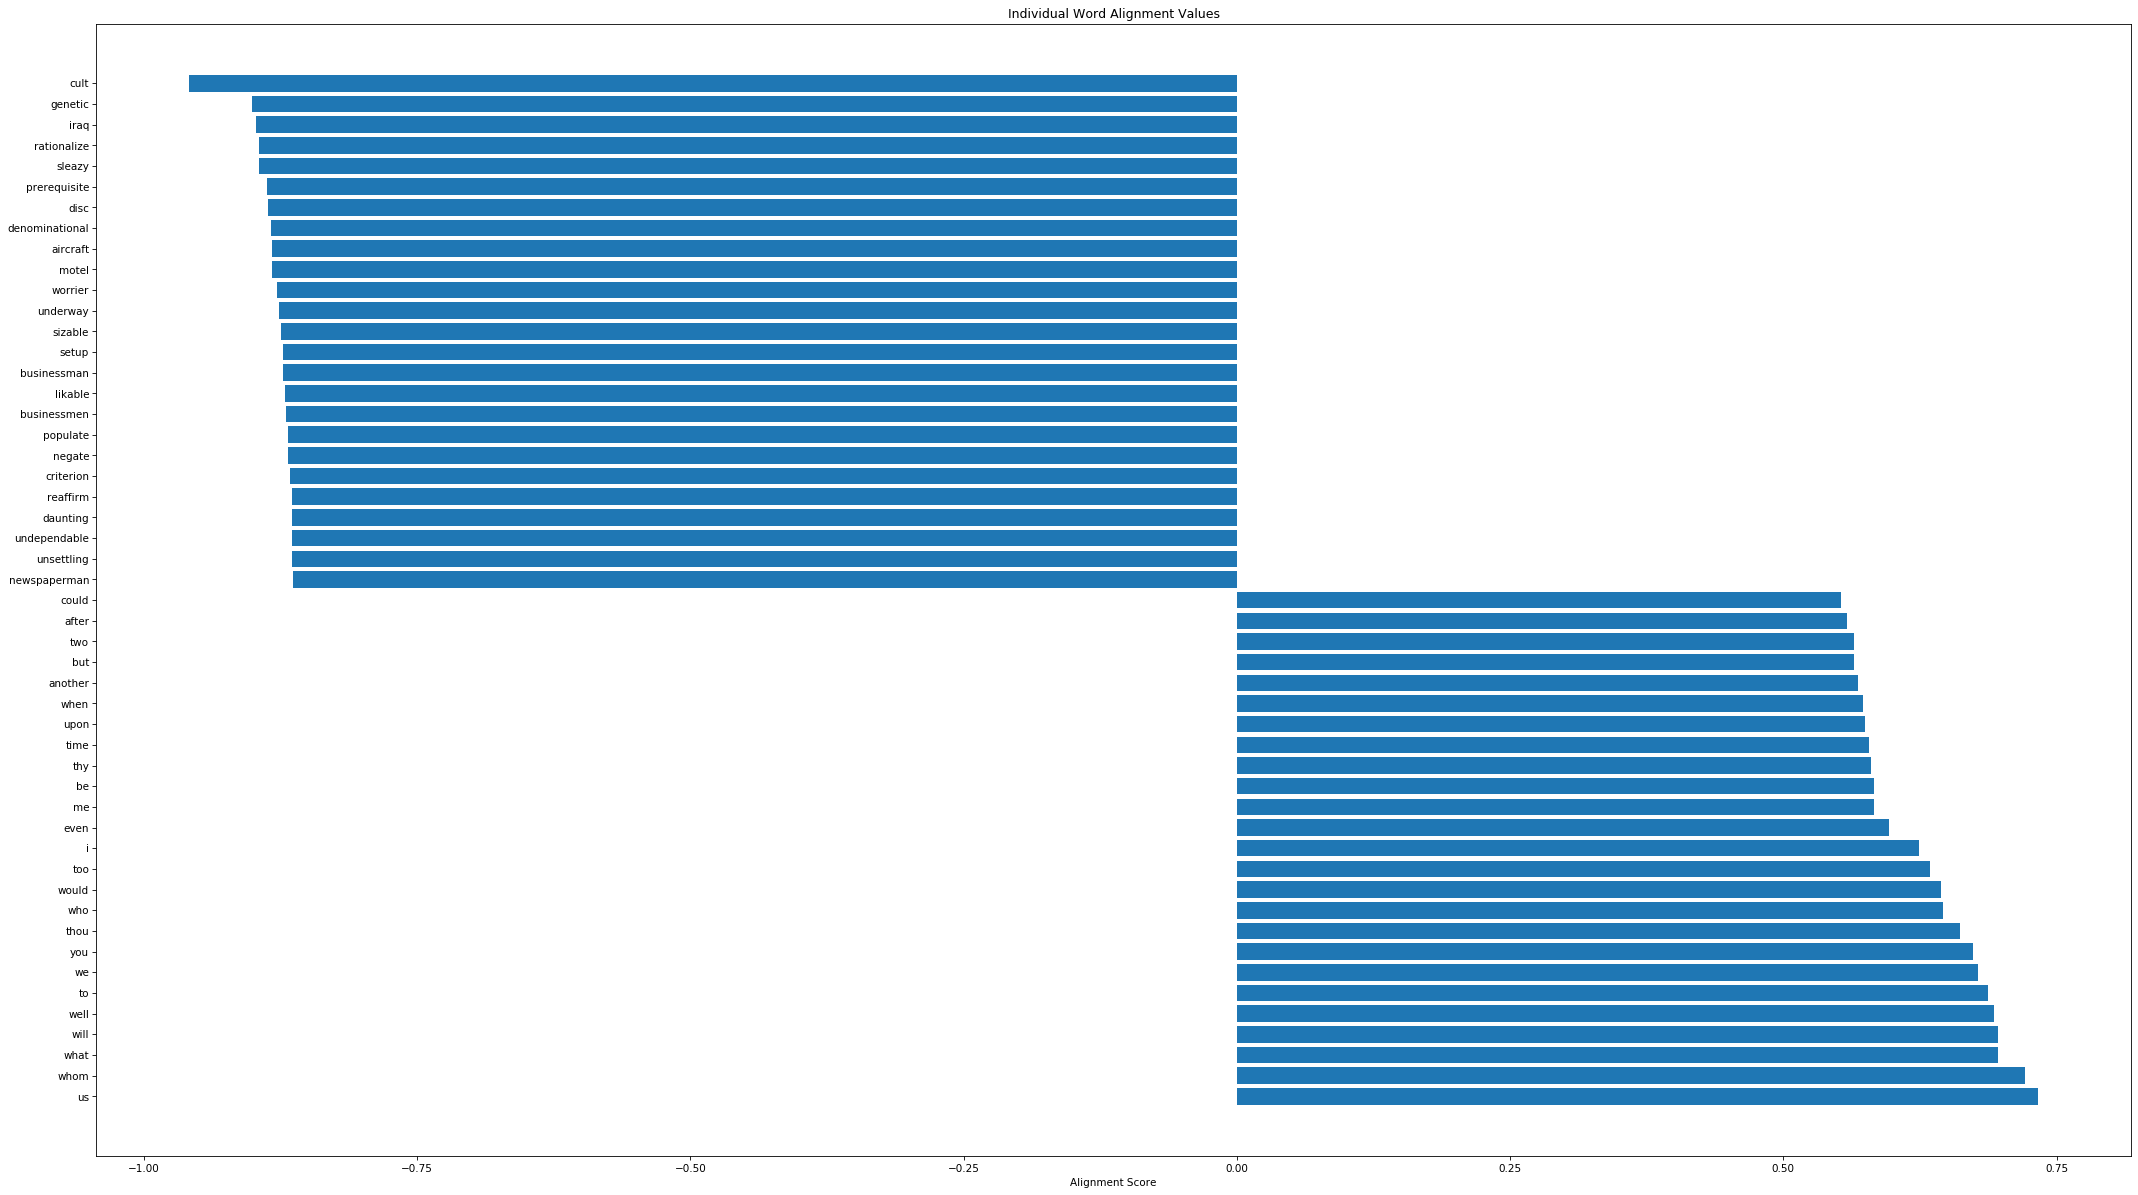

removing 320 stopwords


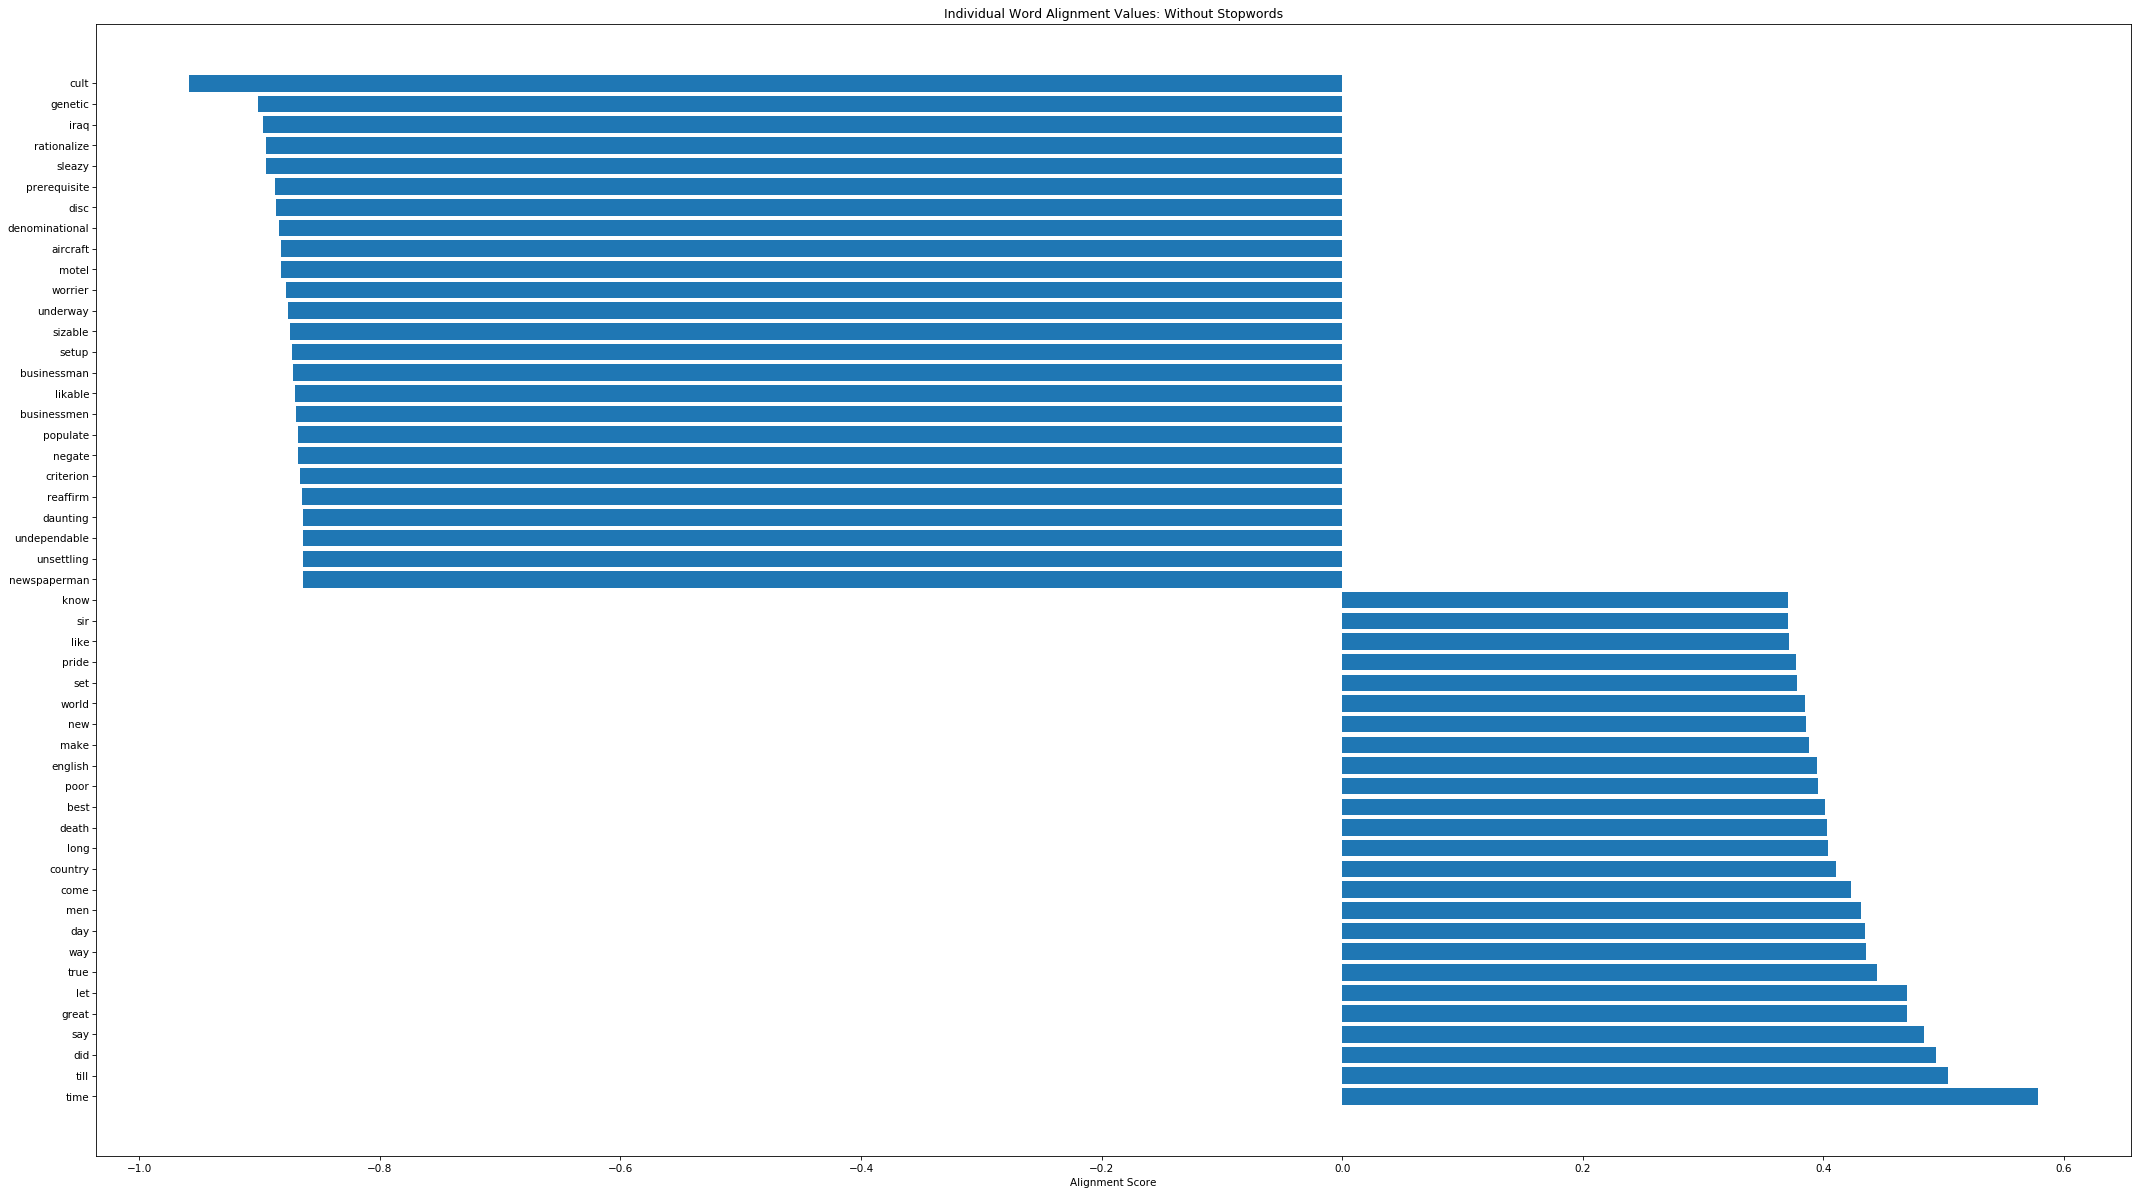

In [16]:
make_alignments(all_categories)

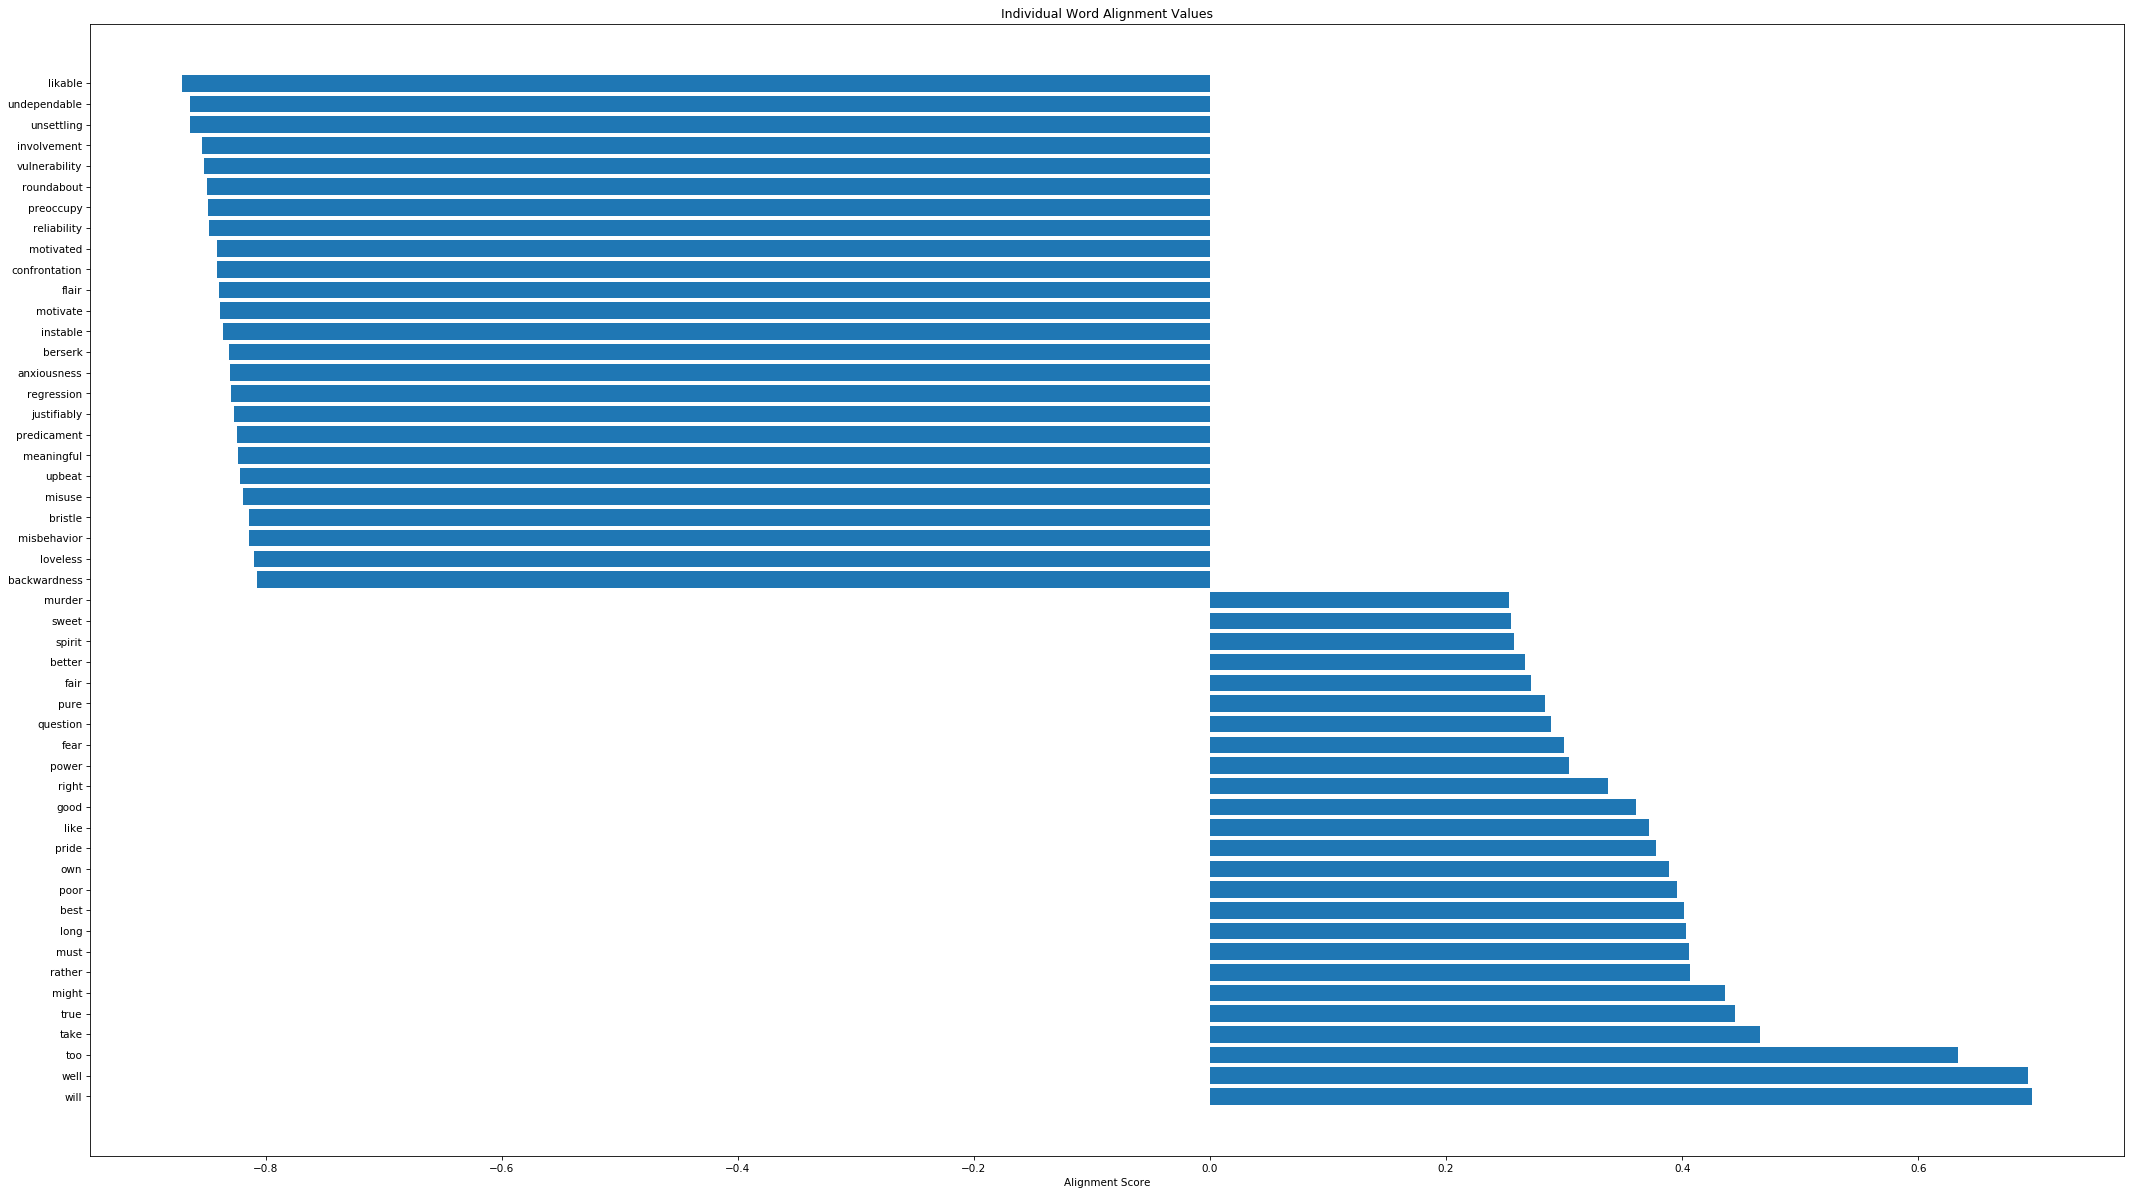

removing 320 stopwords


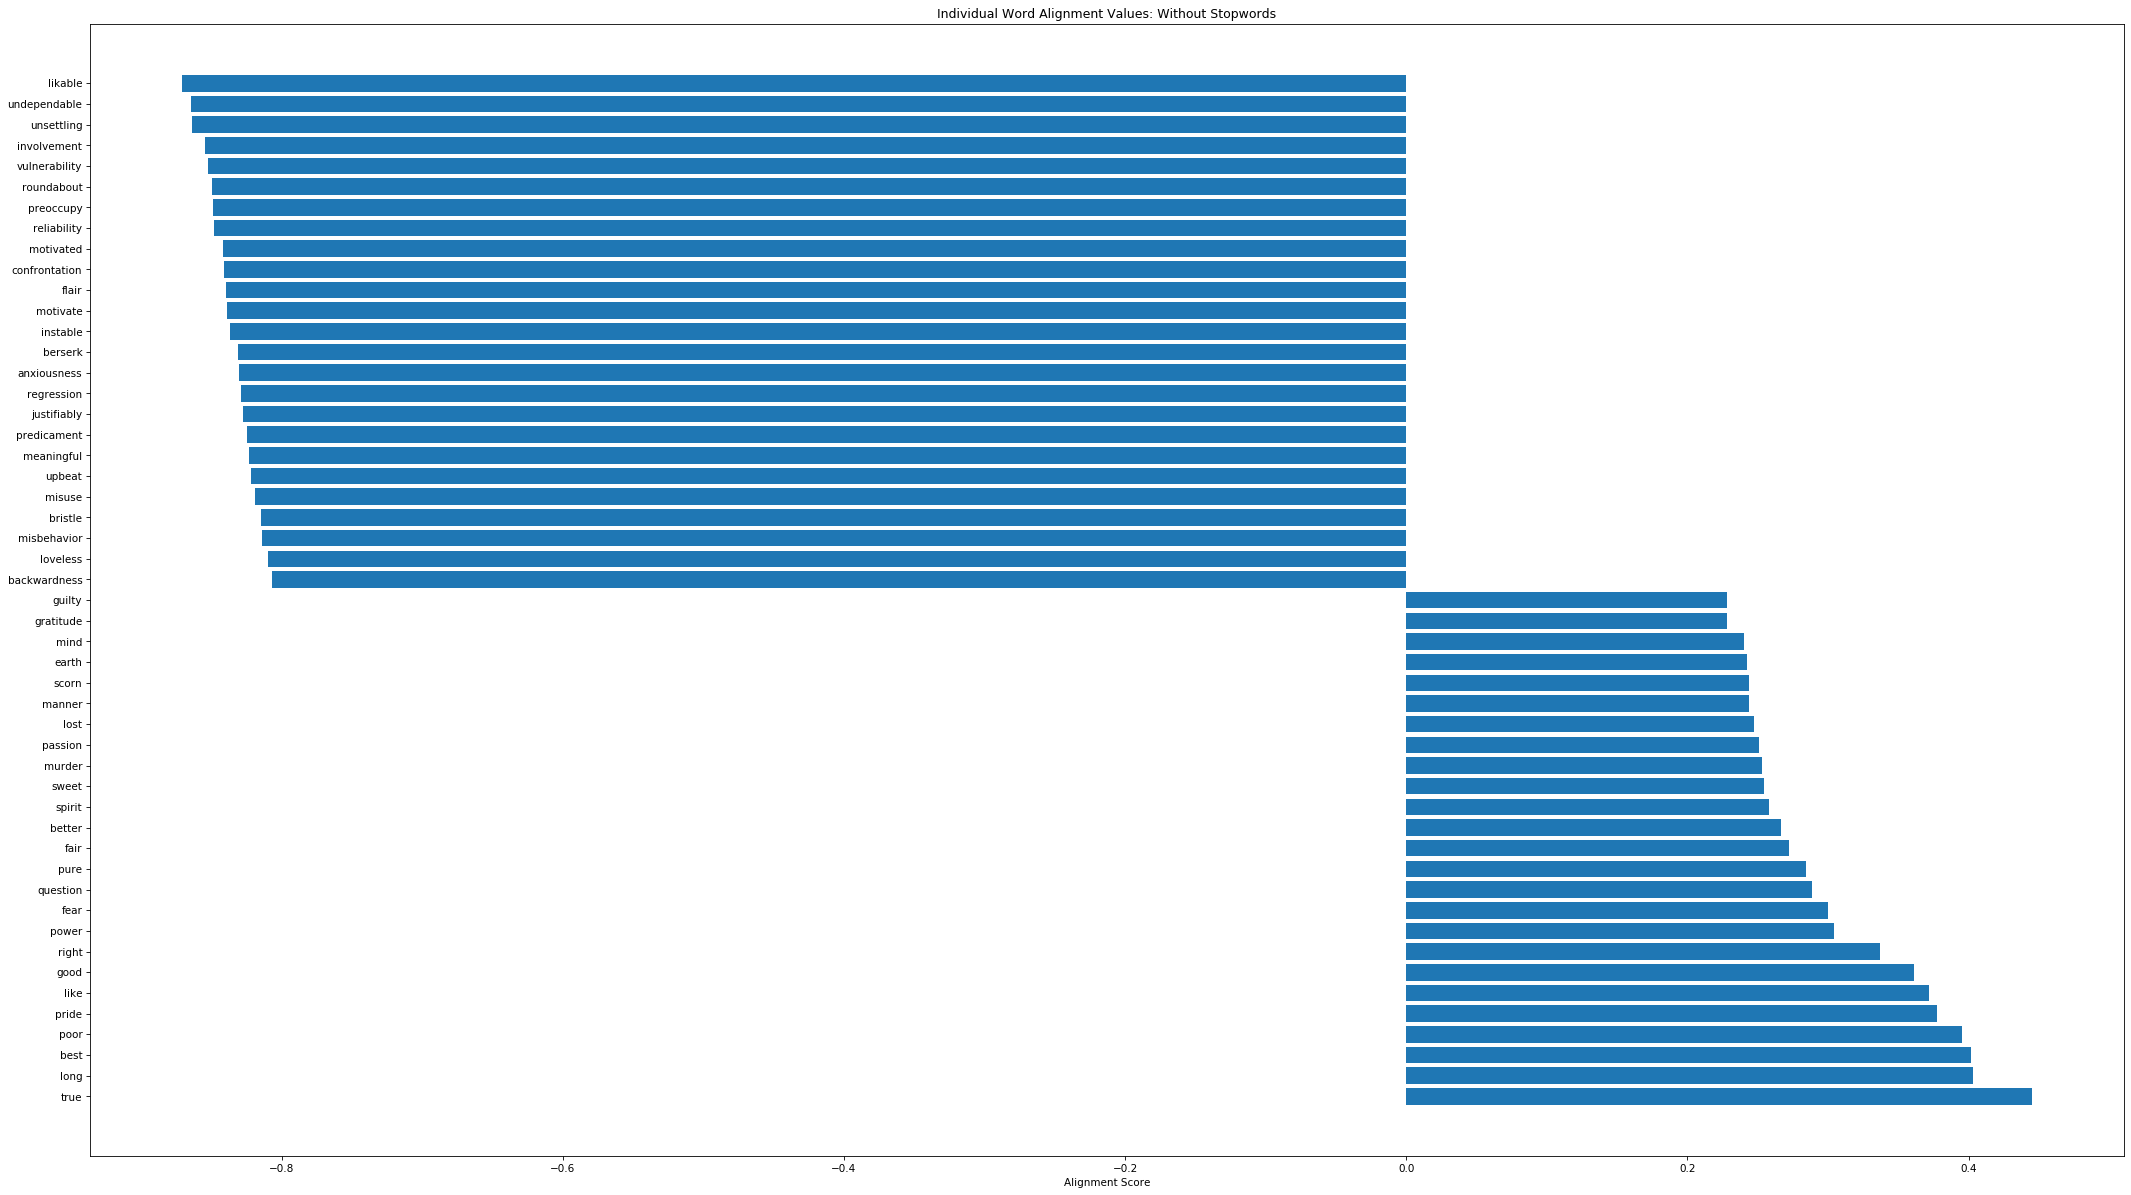

In [17]:
make_alignments(feelings)

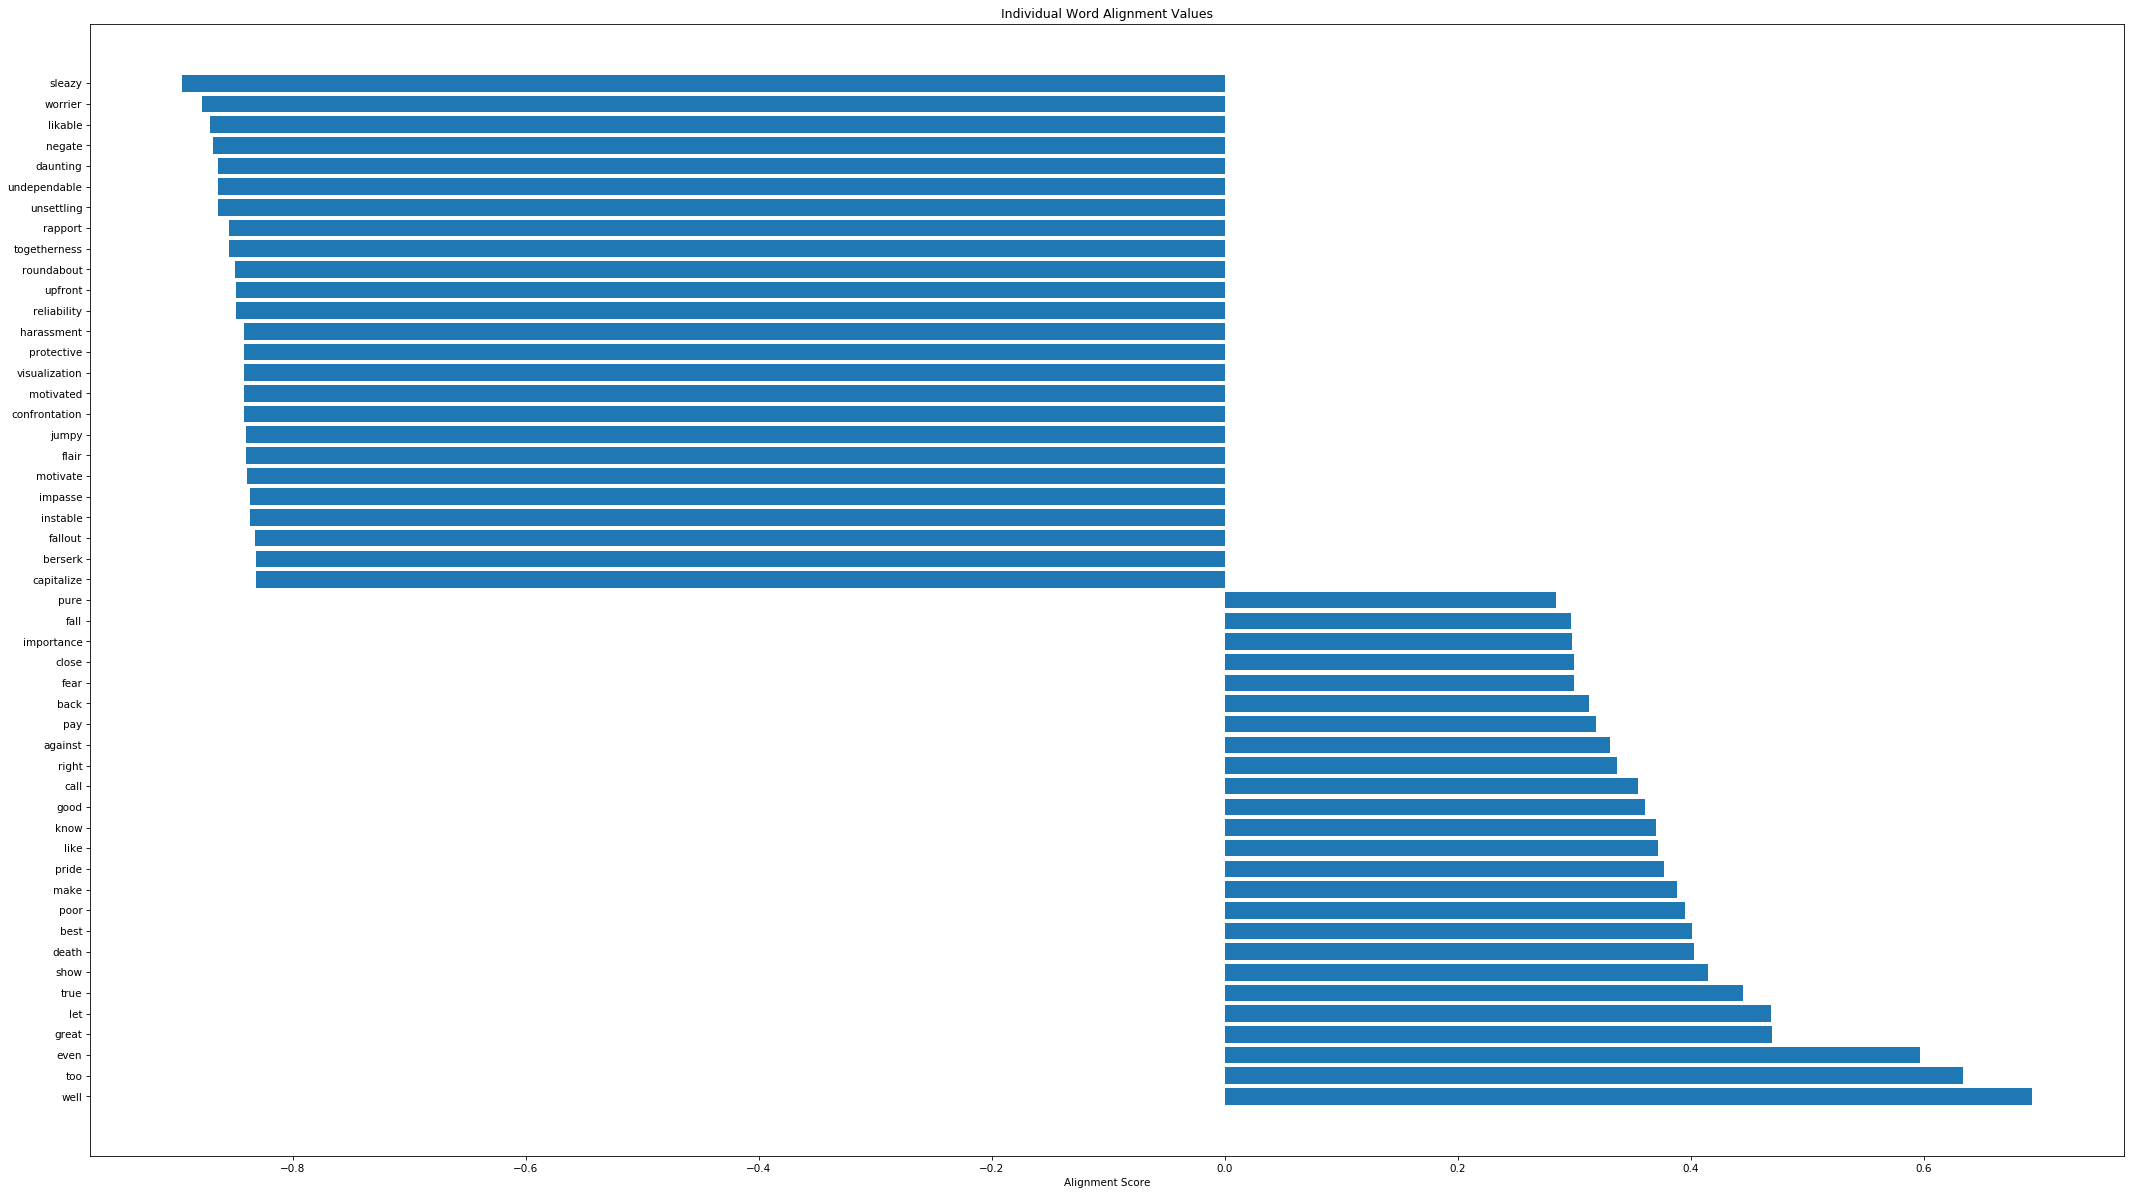

removing 320 stopwords


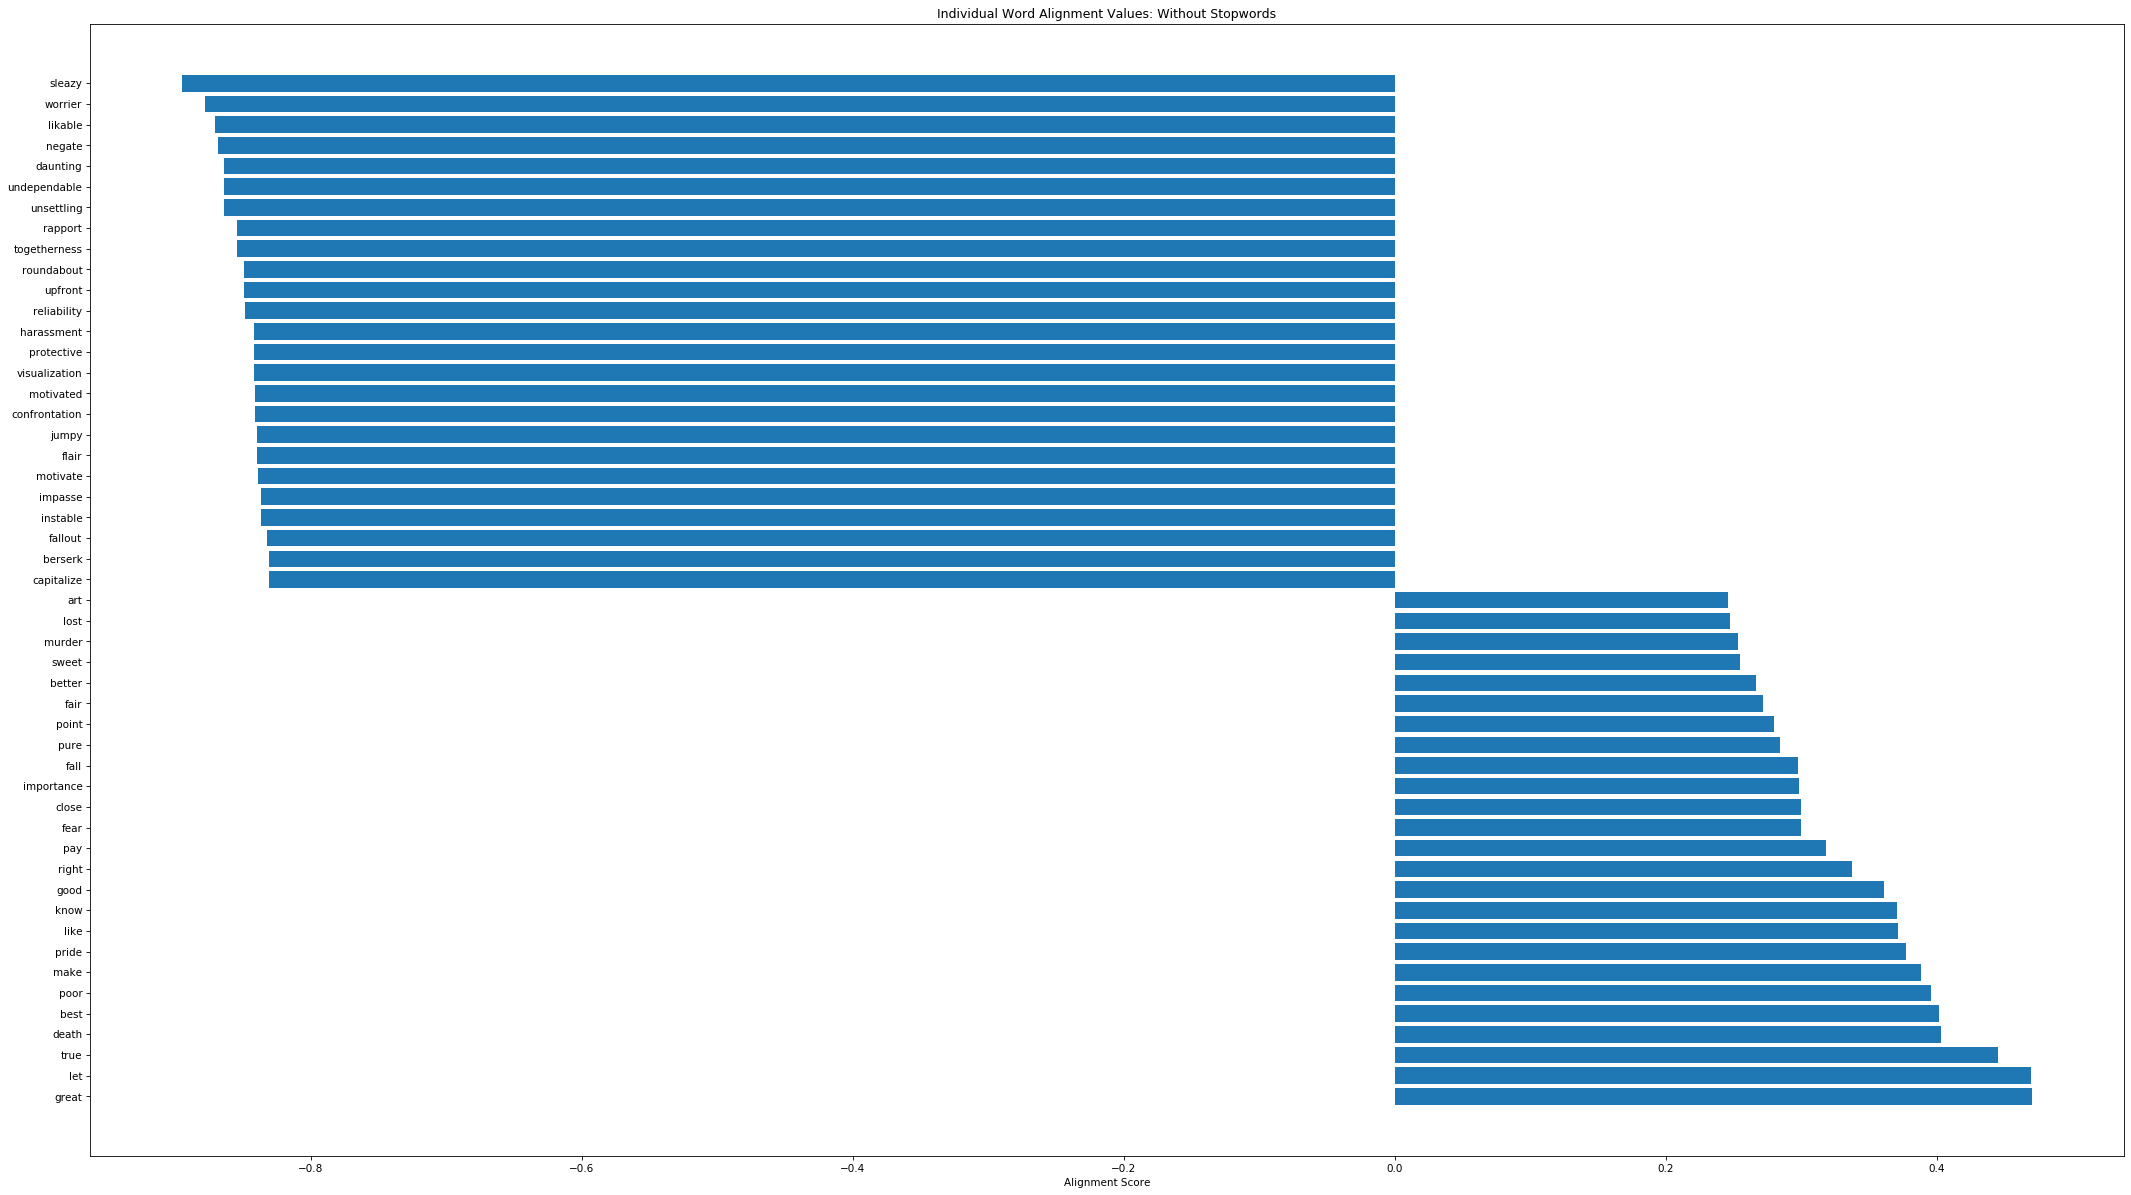

In [18]:
make_alignments(valence)

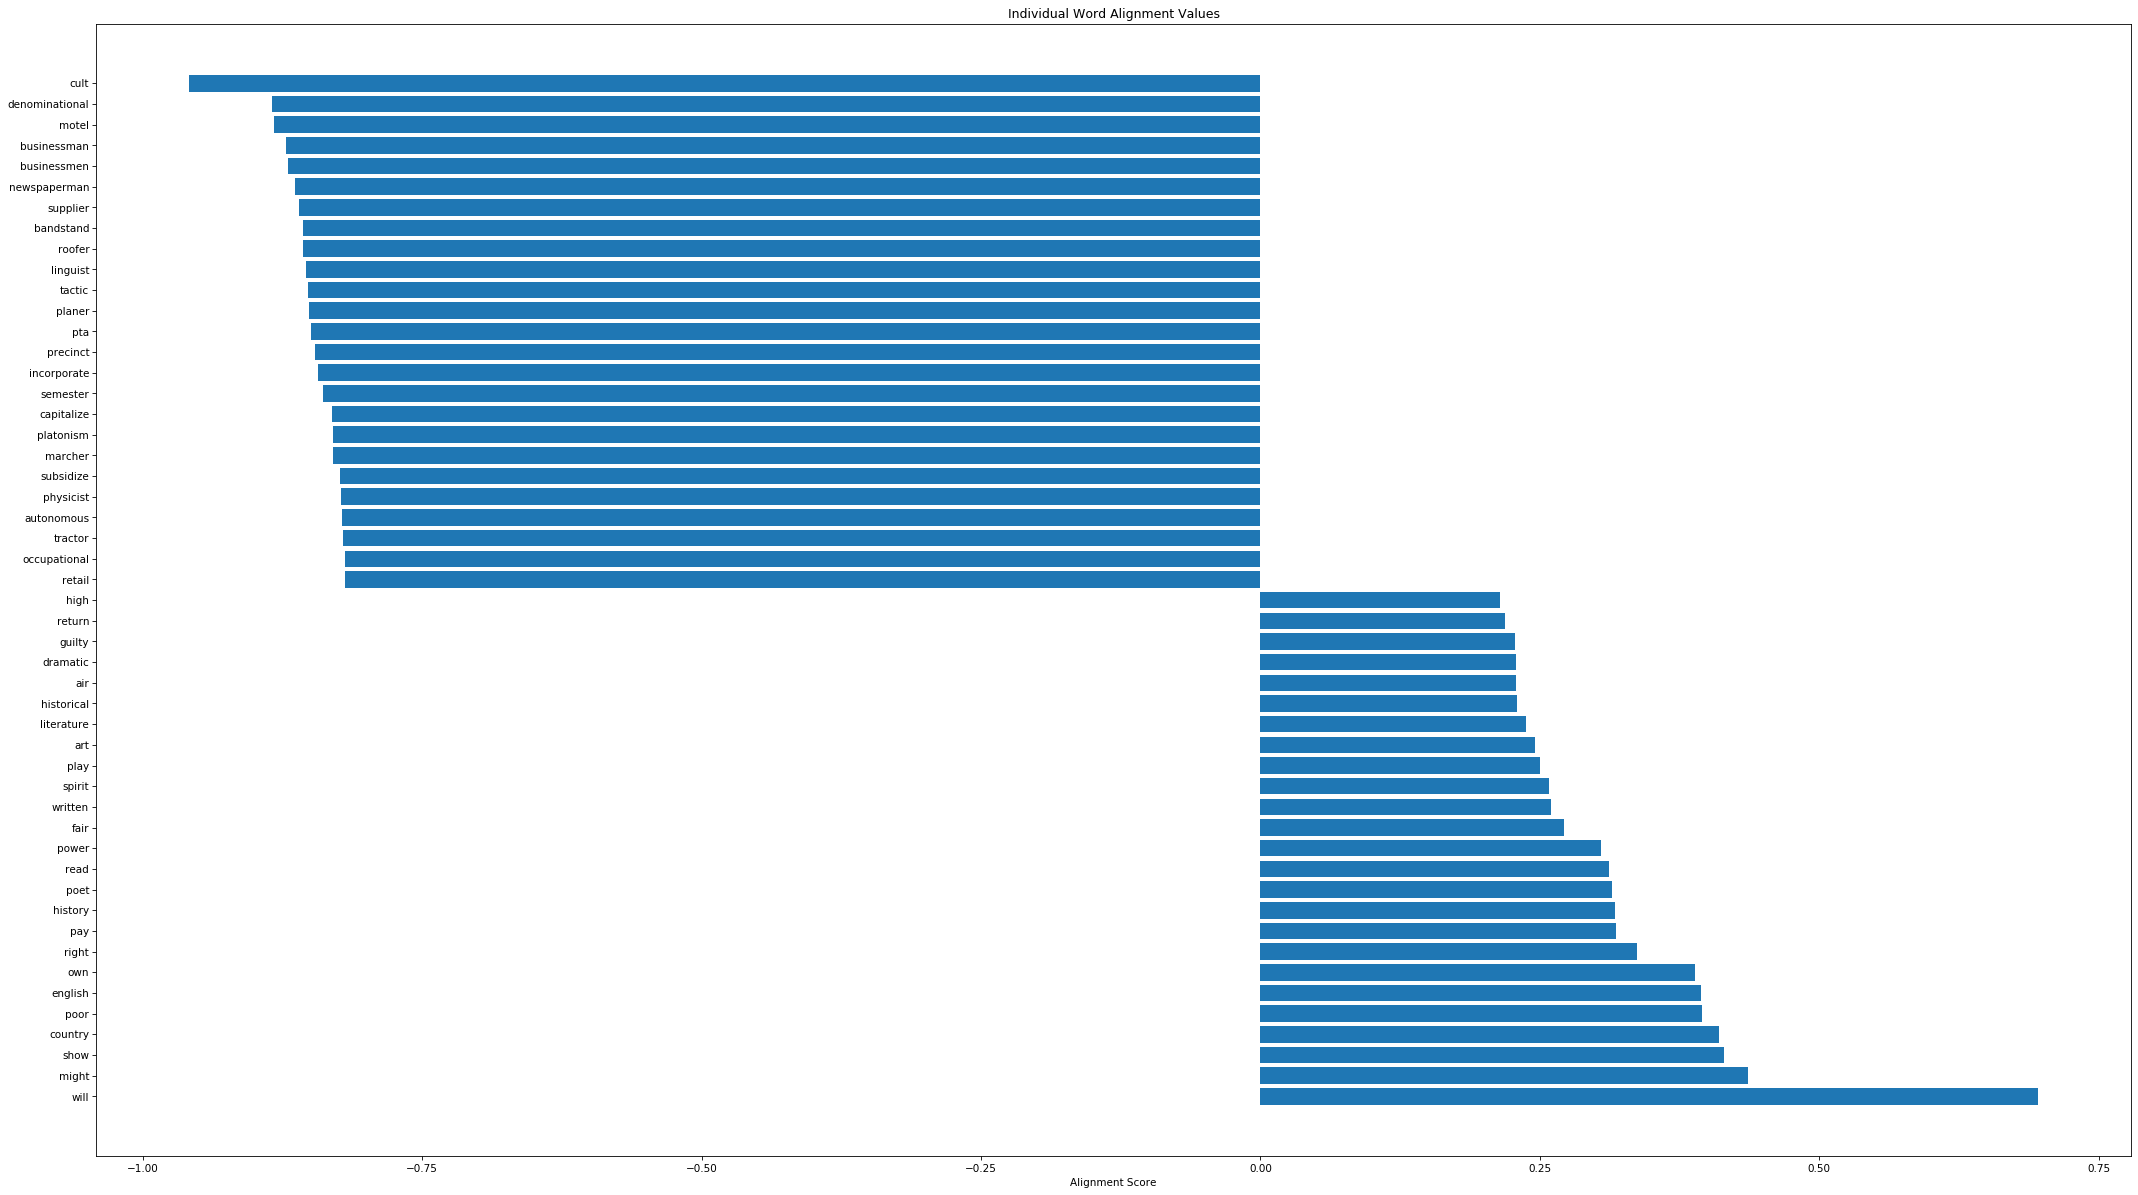

removing 320 stopwords


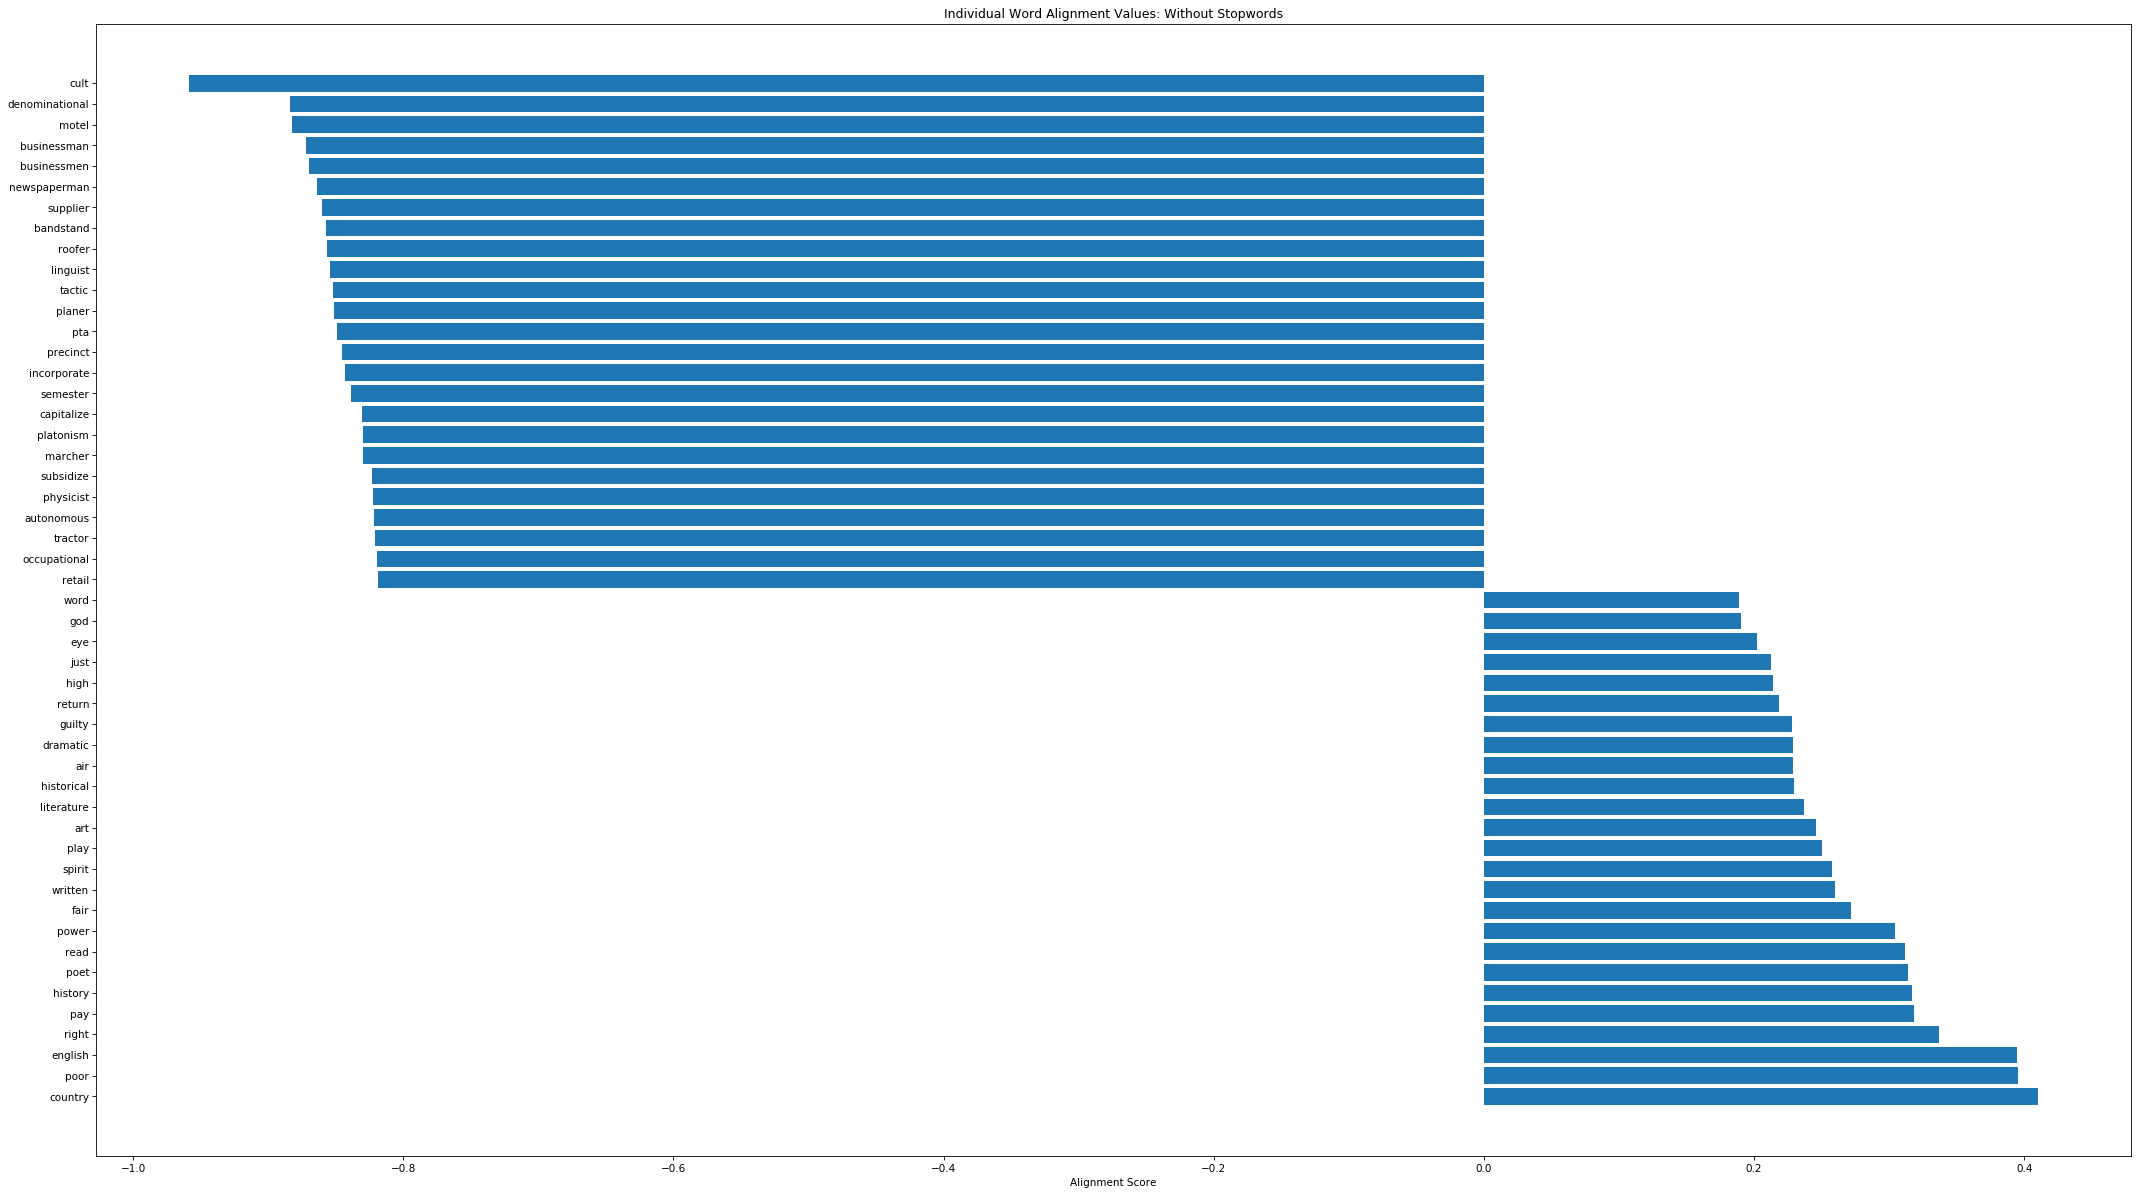

In [19]:
make_alignments(institutional)